0) Haga ejercicios de la Práctica IV en el sitio

1. Sea R una relación sobre A que es simétrica. Pruebe que $\texttt{R}^2$ es también simétrica sobre A.

2. Encuentre el error en la siguiente "prueba" que \underline{incorrectamente} demuestra que cualquier relación R sobre A, que sea transitiva y simétrica tiene que ser reflexiva. Dibuje un contraejemplo que falsifique la afirmación.

"Prueba": Hay que probar que $\forall x \in A:xRx$

Sea x cualquier elemento en A. Vamos a probar que xRx. Sea y en A tal que xRy. La simetría de R implica que yRx. Así obtenemos que xRy y yRx. Por la transitividad de R se sigue que xRx. QED.

3.
a) Escriba en Python un algoritmo check_antisymmetric(MR, A) que reciba la matriz MR de una relación R sobre A y retorne [] si R es antisimétrica. Retorna la lista de todos los pares (x, y) en $\texttt{A}^2$ que incumplen con la antisimétrica en caso contrario. Asuma que A es una lista y que las filas y columnas de MR están ordenadas según A. Asuma que MR es una matrix de Numpy.

b) Haga lo mimso, pero convierta MR en un diagrafo de networkx y usando dicho digrafo tenga la misma funcionalidad anterior.

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


#xRy y yRx sii x = y
def check_antisymmetric(MR, A):
    n = len(A)
    failedList = []
    for i in range(n**2):
        if i // n != i%n:
            if MR.A1[i] == 1:
                if MR.A1[i] == MR.T.A1[i]:
                    failedList += [((i//n)+1,(i%n)+1)]
    return failedList
            
    
MR = np.matrix([[1,1,0], [0,1,0],[0,0,1]])
A = ['a','b','c']
print(check_antisymmetric(MR, A))
    

[]


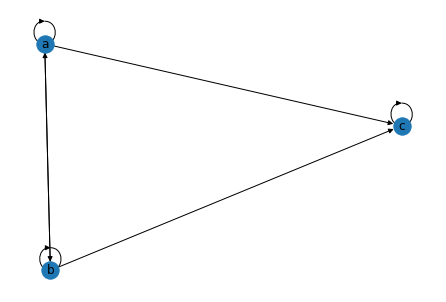

[('a', 'b'), ('b', 'a')]


In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def check_antisymmetric(MR, A):
    n = len(A)
    failedList = []
    digraph = nx.DiGraph()
    digraph.add_nodes_from(A)
    for i in range(n**2):
        if MR.A1[i] == 1:
            digraph.add_edge(A[i//n], A[i%n])
    nx.draw(digraph, with_labels=True)
    plt.show()
    
    for i in digraph.edges:
        j = i[0]
        k = i[1]
        if digraph.has_edge(k, j) and j != k:
            failedList += [(j, k)]
    
    return failedList

MR = np.matrix([[1,1,1], [1,1,1],[0,0,1]])
A = ['a','b','c']
print(check_antisymmetric(MR, A))


1) Considere ejercicio 1) del pasado 16/5 sobre el mapa de provincias y networkx. Codifique a mano en formato graphml dicho grafo. Para esto, copie y adapte alguno de los archivos del demo_data. Estudie nx_draw que se le entregó. Usando lo que devuelve 'greedy_color', integre adecuadamente con nx_draw y logre una visualización del grafo de provincias coloreado.

In [ ]:
import networkx as nx

A = 'Alajuela'
H = 'Heredia'
SJ = 'San Jose'
G = 'Guanacaste'
P = 'Puntarenas'
C = 'Cartago'
L = 'Limon'

V = [A, H, SJ, C, P, L, G]
E = [(G,P), (G,A), (A,H), (A, SJ), (A, P), (H, SJ), (H, L), (SJ, P), (SJ, C), (SJ, L), (P, L), (C, L)]

costaRicaG = nx.Graph(E)
nx.draw(costaRicaG, with_labels=True)
plt.show()


costaRicaGColored = nx.coloring.greedy_color(costaRicaG, strategy="largest_first")

print(costaRicaGColored)